In [55]:
from sklearn.linear_model import LinearRegression
from random import randint, uniform, gauss
C_train = 1000000
Inf = 10**2

res1 = []
steps = []
alpha = uniform(1, Inf)
G = uniform(1, Inf)

for sigma in range(1, 1001, 100):
    X_train = []
    y_train = []
    
    for i in range(C_train):
        x0 = uniform(1, Inf)
        e = gauss(0, sigma)
        
        X_train.append([x0])
        y_train.append(x0 * alpha + e)
    model = LinearRegression(fit_intercept=False)
    model.fit(X_train, y_train)
    C_test = 1000
    
    X_test = []
    y_test = []
    for i in range(C_test):
        x0 = uniform(1, Inf)
        e = gauss(0, sigma)
        
        X_test.append([x0])
        y_test.append(x0 * alpha + e)
    y_pred = model.predict(X_test)
    
    score = model.score(X_test, y_test)
    print(alpha, " alpha")
    
    res = []
    for i in range(C_test):
        res.append(y_pred[i] / X_test[i][0])
        y_pred = model.predict(X_test)
    alpha_pred = sum(res) / len(res)
    
    sigma_pred = 0
    for i in range(C_test):
        sigma_pred += (y_test[i] - y_pred[i]) ** 2
    sigma_pred = ((1 / C_test) * sigma_pred) ** 0.5

    print(alpha_pred, " alpha_pred\n\n")
    
    print(sigma, " sigma")
    print(sigma_pred, " sigma_pred\n")
    
    print(score * 100, " score")
    res1.append(score * 100)
    steps.append(sigma)

87.23665911297371  alpha
87.23663232081266  alpha_pred


1  sigma
1.0137891053246164  sigma_pred

99.99998357317885  score
87.23665911297371  alpha
87.23494502607947  alpha_pred


101  sigma
99.76687432338183  sigma_pred

99.83238672681559  score
87.23665911297371  alpha
87.23466976670481  alpha_pred


201  sigma
206.56151804351575  sigma_pred

99.2777644684413  score
87.23665911297371  alpha
87.23992435303816  alpha_pred


301  sigma
315.5703323182556  sigma_pred

98.35526487340307  score
87.23665911297371  alpha
87.22639236324689  alpha_pred


401  sigma
409.4057818286474  sigma_pred

97.26956045818883  score
87.23665911297371  alpha
87.24054592033437  alpha_pred


501  sigma
495.9142987574362  sigma_pred

96.13382132424302  score
87.23665911297371  alpha
87.2480973795796  alpha_pred


601  sigma
626.1775140703969  sigma_pred

94.10764401500276  score
87.23665911297371  alpha
87.24351981592301  alpha_pred


701  sigma
686.4005508646723  sigma_pred

93.13520345334854  score
87.2366591

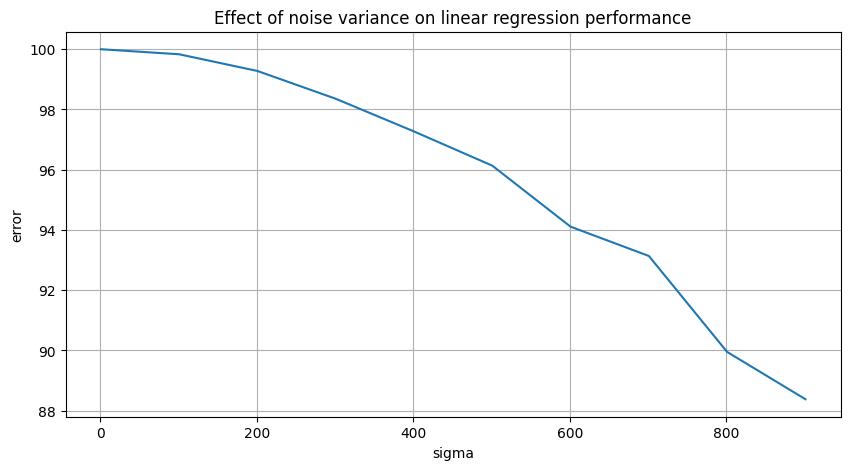

In [57]:
import numpy as np
import matplotlib.pyplot as plt

vec = np.array(res1, dtype=float)
steps_arr = np.array(steps, dtype=float)

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(steps_arr, vec, label="x")
plt.title("увелечение ошибки при увелечении шума")
ax.set_xlabel("sigma")
ax.set_ylabel("ошибка")
ax.grid(True)

ax.ticklabel_format(style='plain', axis='both', useOffset=False)

plt.show()
